In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
salaryhike=pd.read_csv("Salary_Data.csv")
salaryhike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# Renaming the columns
sh=salaryhike.rename({"YearsExperience":"yoe"},axis=1)
sh

,yoe,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# Checking the Rows and columns
sh.shape

(30, 2)

In [ ]:
# Checking the data types
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yoe     30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# Checking the null
sh.isna().sum()

yoe       0
Salary    0
dtype: int64

In [ ]:
# Checking any salary is 0 or less
sh[sh['Salary']<=0]

,yoe,Salary


In [ ]:
# Checking the duplicates
sh[sh.duplicated('yoe')]

,yoe,Salary
8,3.2,64445.0
12,4.0,56957.0


In [ ]:
# Remove the duplicates
sh_clean=sh.drop_duplicates()
sh.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9f09cd6f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9f09cdc30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9f09cd450>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9f09ce170>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9f09ce410>],
 'means': []}

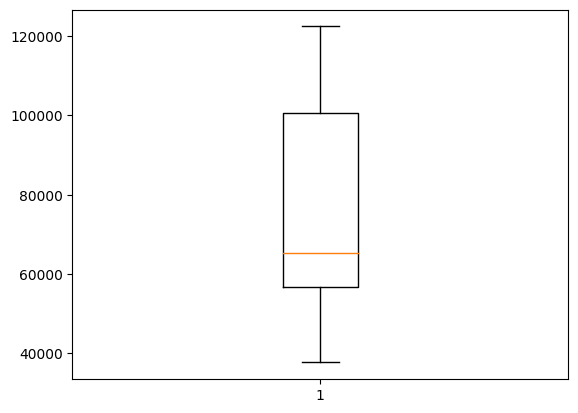

In [ ]:
# Checking for outliers
plt.boxplot(sh_clean.Salary)

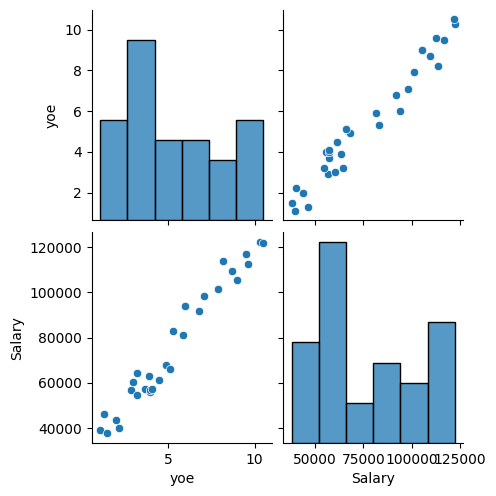

In [ ]:
# Creating a pair plot
sns.pairplot(sh_clean)

In [ ]:
# Find the correlation
sh_clean.corr()

,yoe,Salary
yoe,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Salary', ylabel='Density'>

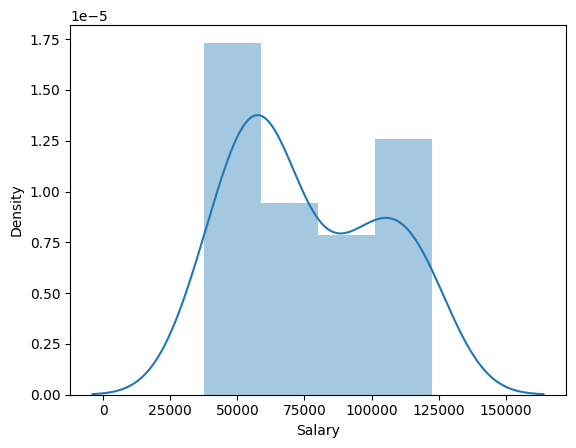

In [ ]:
sns.distplot(sh_clean.Salary)

<Axes: xlabel='yoe', ylabel='Salary'>

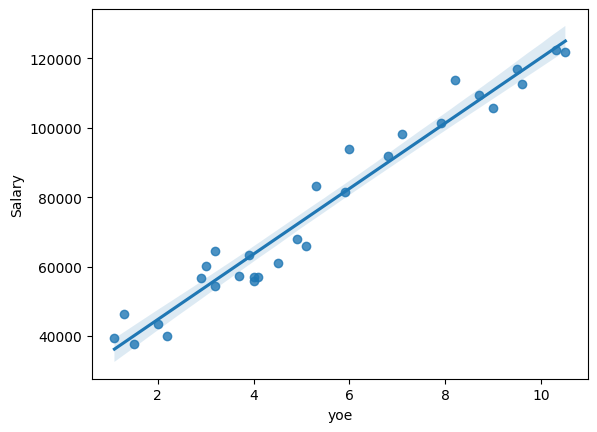

In [ ]:
sns.regplot(x=sh_clean['yoe'],y=sh_clean['Salary'])

# **Model creation**

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~yoe", data= sh_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        06:01:47   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
yoe         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model1=smf.ols("Salary~np.log(yoe)", data= sh_clean).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           3.25e-13
Time:                        06:03:26   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(yoe)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2=smf.ols("Salary~np.square(yoe)", data= sh_clean).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           1.52e-16
Time:                        06:06:00   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(yoe)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3=smf.ols("Salary~np.sqrt(yoe)", data= sh_clean).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           8.57e-18
Time:                        06:06:28   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(yoe)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4=smf.ols("Salary~np.log(np.sqrt(yoe))", data= sh_clean).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           3.25e-13
Time:                        06:07:10   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(np.sqrt(yoe))  8.116e+04   6344.907     12.792      0.000    6.82e+04    9.42e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Prediction for Salary hike

# As our model is the best performimng model we are using to predict the Salary hike

newdata=pd.Series([6,12,10])
dt_pred=pd.DataFrame(newdata,columns=['yoe'])
dt_pred

,yoe
0,6
1,12
2,10


In [ ]:
model.predict(dt_pred)

0     82491.974127
1    139191.748056
2    120291.823413
dtype: float64